In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from datetime import datetime
sns.set(rc = {'figure.figsize':(12,6)})
sns.set_palette('colorblind')

In [2]:
df=pd.read_csv('final_ds.csv')

In [3]:
def histplt(df, text):
    fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharey=True)
    fig.suptitle(text)
    plt.subplots_adjust(hspace = 0.8)
    
    sns.histplot(ax=axes[0,0], data=df, x='DayofWeek',bins=30,kde=True)
    axes[0,0].set_title('Day of the week')

    sns.histplot(ax=axes[0,1],data=df, x='HourofDay', bins=30,kde=True)
    axes[0,1].set_title('Hour of the Day')

    sns.histplot(ax=axes[1,0],data=df,x='Month', bins=30, kde=True)
    axes[1,0].set_title('Month')

    sns.histplot(ax=axes[1,1],data=df,x='ValueOAT', bins=30, kde=True)
    axes[1,1].set_title('Outside air temperature')

    sns.histplot(ax=axes[2,0],data=df,x='ValueRT', bins=30, kde=True)
    axes[2,0].set_title('Room temperature')

    sns.histplot(ax=axes[2,1],data=df,x='ValueST', bins=30, kde=True)
    axes[2,1].set_title('Set point temperature')
    
    sns.histplot(ax=axes[3,0],data=df,x='ValueOAH', bins=30, kde=True)
    axes[3,0].set_title('Outside Air Humidity')
    
    sns.histplot(ax=axes[3,1],data=df,x='STDeviation', bins=30, kde=True)
    axes[3,1].set_title('Set Point & Room Temperature Difference')

In [4]:
def dt(dtstring): 
    x=datetime.strptime(dtstring, '%Y-%m-%d %H:%M:%S')
    return x
df.dtypes
df['TimeOMS']=df['TimeOMS'].apply(lambda x: dt(x))
df['TS']= df['TimeOMS'].apply(lambda x: x.timestamp())

In [5]:
def scatterplt(df, xax,yax,hue1):
    fig, ax = plt.subplots(figsize = (10,4))
    ax = sns.scatterplot(x = xax, y = yax,data=df, hue=hue1, palette='colorblind')
    ttl= yax + " VS " + xax
    plt.title(ttl)
    plt.show()
    #sns.color_palette(palette='dark')

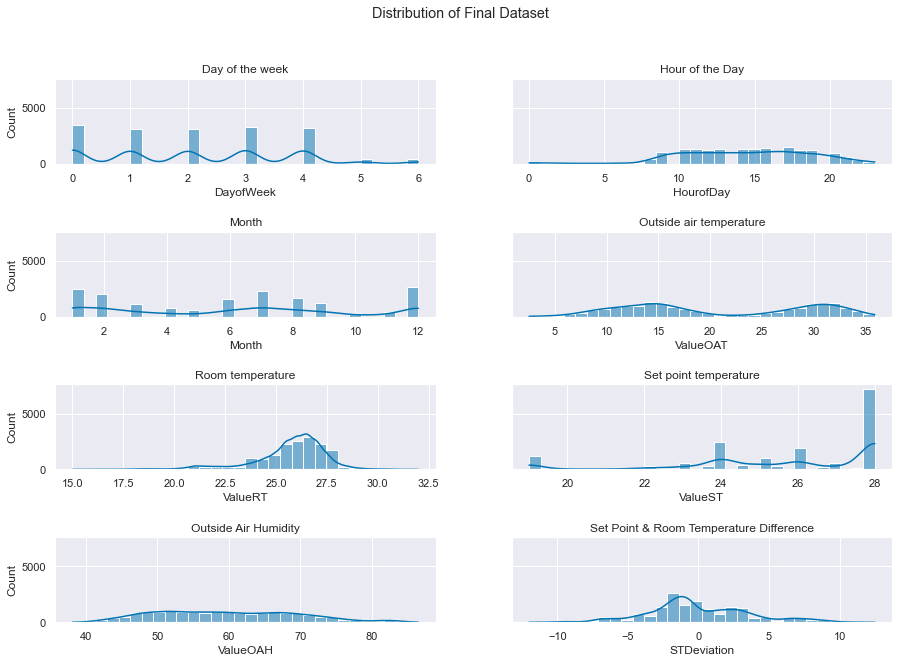

In [6]:
histplt(df, 'Distribution of Final Dataset')

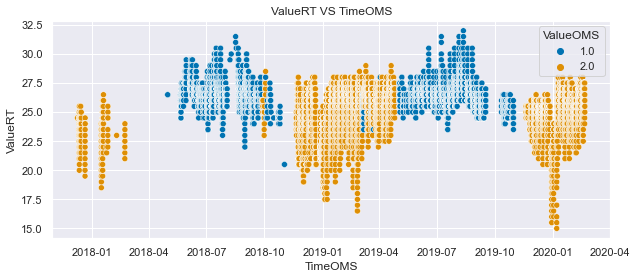

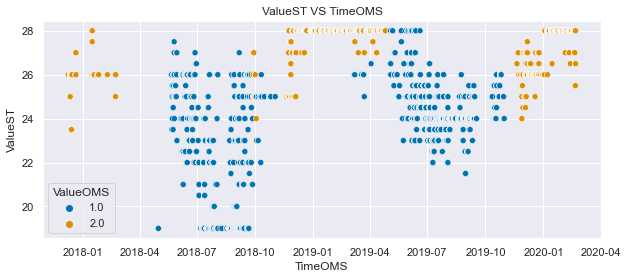

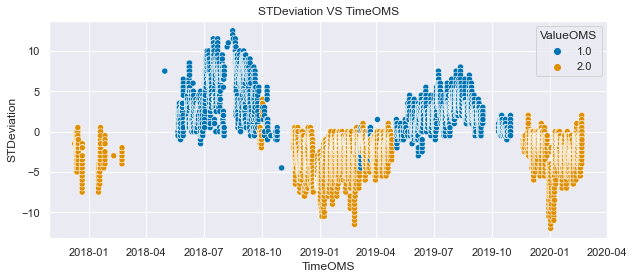

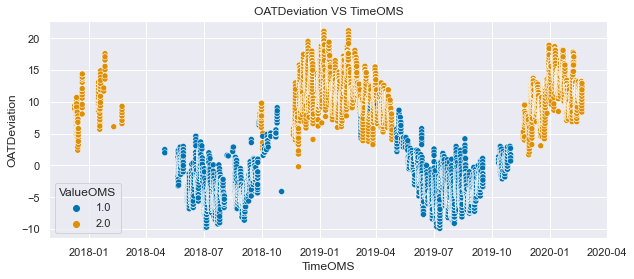

In [7]:
scatterplt(df, 'TimeOMS', 'ValueRT', 'ValueOMS')

scatterplt(df, 'TimeOMS', 'ValueST', 'ValueOMS')

scatterplt(df, 'TimeOMS', 'STDeviation', 'ValueOMS')

scatterplt(df, 'TimeOMS', 'OATDeviation', 'ValueOMS')